In [3]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
%matplotlib inline 

In [4]:
bar = pd.read_csv('/Users/arturdanyliv/Downloads/course-files/weather_barcelona.csv',index_col='Date')

In [5]:
rom = pd.read_csv('/Users/arturdanyliv/Downloads/course-files/weather_rome.csv',index_col='Date')

In [6]:
ams = pd.read_csv('/Users/arturdanyliv/Downloads/course-files/weather_amsterdam.csv',index_col='Date')

In [7]:
temp_max = pd.DataFrame(index = bar.index)

In [8]:
temp_max['Barcelona'] = bar['TempMax']
temp_max['Rome'] = rom['TempMax']
temp_max['Amsterdam'] = ams['TempMax']

In [9]:
def GradeDay(row):
    if(row["TempMax"] >= row['AvgTempMax']):
        return 'PLUS'
    else:
        return "MINUS"

In [10]:
rom['GradeDay'] = rom.apply(GradeDay, axis=1)
bar['GradeDay'] = bar.apply(GradeDay, axis=1)
ams['GradeDay'] = ams.apply(GradeDay, axis=1)

In [11]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [12]:
rom['GradeDay'].value_counts()
# 70 dni na plus a 20 dni na minus
# te dane zbieramy dla kazdego z trzech miast 

PLUS     70
MINUS    20
Name: GradeDay, dtype: int64

In [13]:
# nowy obiekt I TE DANE i przechowujemy tam to info 
cities3 = pd.DataFrame(index=['MINUS','PLUS'])

In [14]:
# Dla kazdego z trzech miast cities 3 dodaje kolumne z nazwa tego miasta 
# ktorej wartosc jest rowna ilosci dni na + i na - wyliczonych dla tego miasta 
cities3['Barcelona'] = bar['GradeDay'].value_counts()

In [15]:
cities3['Rome'] = bar['GradeDay'].value_counts()

In [16]:
cities3['Amsterdam'] = ams['GradeDay'].value_counts()

In [17]:
cities3

,Barcelona,Rome,Amsterdam
MINUS,26,26,22
PLUS,64,64,68


<Axes: ylabel='Barcelona'>

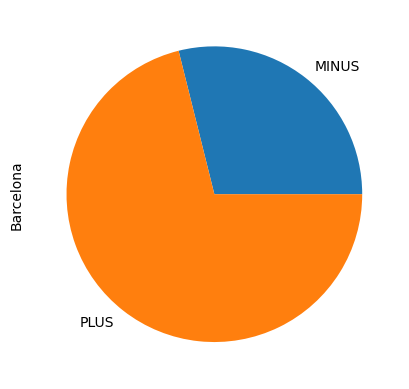

In [18]:
# wykres tylko i wylacznie dla jednego miasta 
# kind chce zobaczyc dane na wykresie kolowym
cities3['Barcelona'].plot(kind='pie')

<Axes: ylabel='Barcelona'>

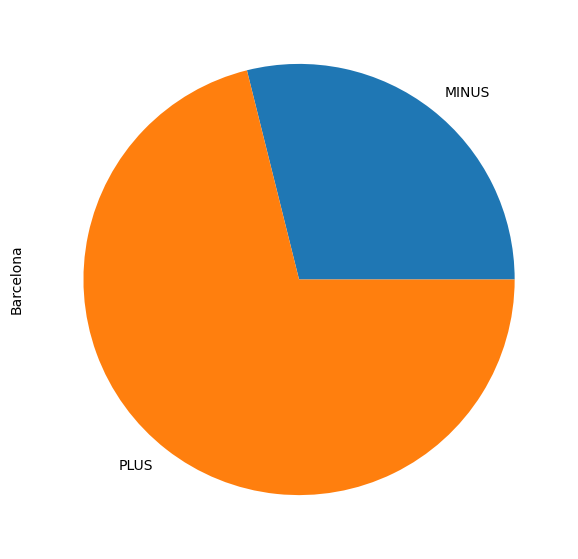

In [19]:
# zmienic rozmiar wykresu 
# figsize wysokosc i szerokosc 
cities3['Barcelona'].plot(kind='pie',figsize=(7,7))

array([<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>,
       <Axes: ylabel='Amsterdam'>], dtype=object)

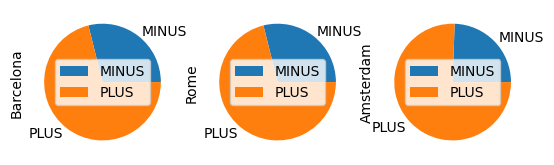

In [21]:
# cities3.plot(kind='pie') ---> blad 
# wykres kolowy moze pokazac jedynie dla jednej serii a tu jest 3 serii 
# subplots ---> polaczyc 3 wykresy na raz 
cities3.plot(kind='pie',subplots=True)

array([<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>,
       <Axes: ylabel='Amsterdam'>], dtype=object)

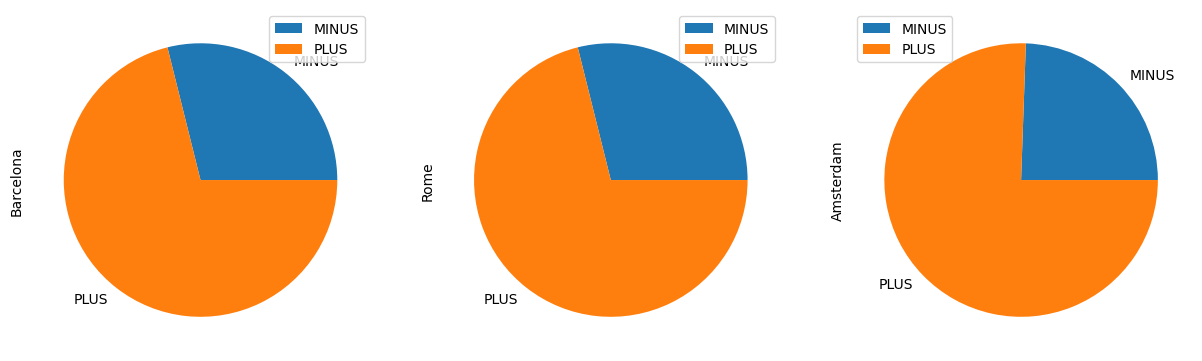

In [22]:
cities3.plot(kind='pie',subplots=True,figsize=(15,5)) # rozciagamy dane

array([<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>,
       <Axes: ylabel='Amsterdam'>], dtype=object)

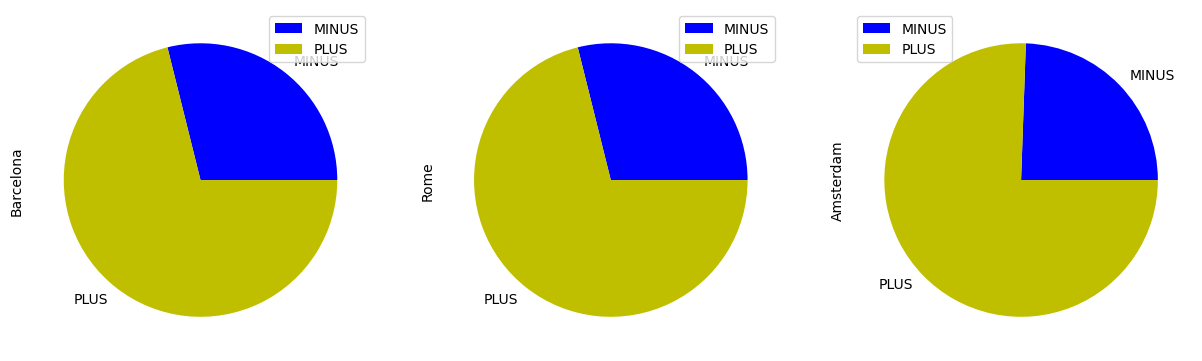

In [26]:
# dni chlodniejsze zaznaczyc kolorem niebieskim a cieplejsze zielonym 
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['b','y'])

array([<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>,
       <Axes: ylabel='Amsterdam'>], dtype=object)

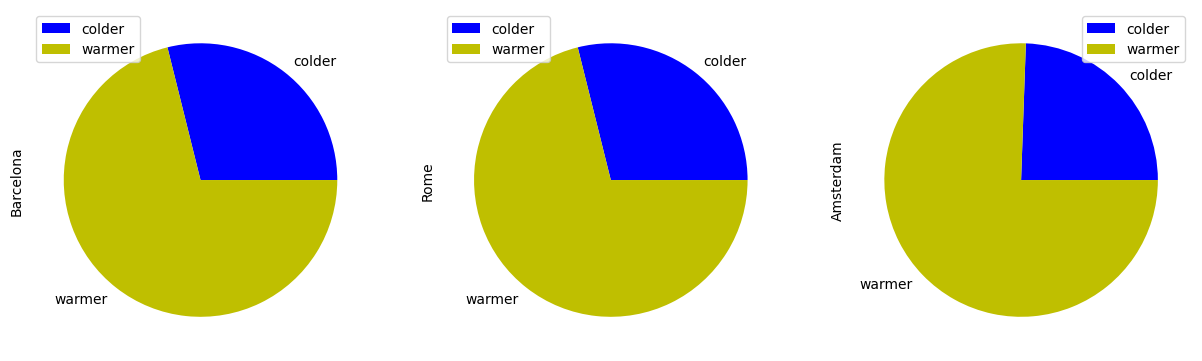

In [27]:
# wykonac zmiany tylko i wylacznie pod czas wyswietlania wykresu ---> labels
# ZMIENIC NAZWE MINUS PLUS ----> labels
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['b','y'],labels=['colder','warmer']) 

array([<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>,
       <Axes: ylabel='Amsterdam'>], dtype=object)

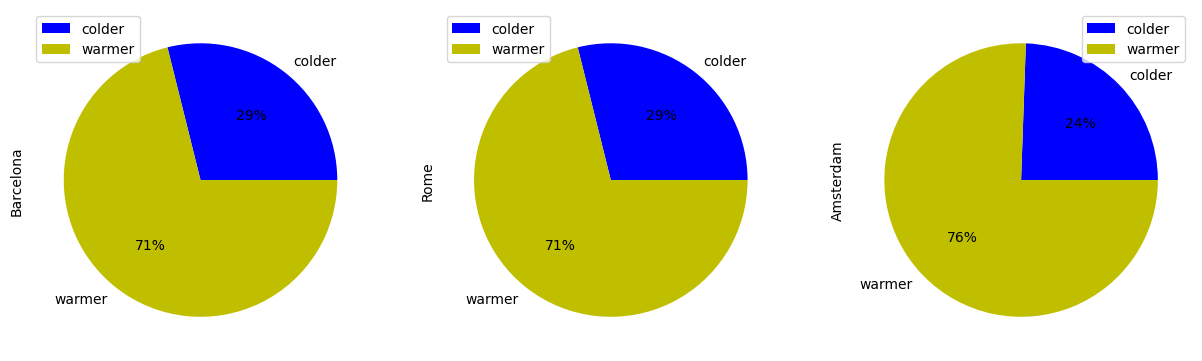

In [28]:
# Zmodyfikowac kilka parametrow za ednym zamachem 
# przy kazdej wartosci ktora jest wyswietlana to niech pokaze wartosc procentowa zwiazana z tym fragmentem kolowym 
# foramtowanie do 0 liczby miejs po przecinku a 2 znaki % ktore na koncu sa oznaczaja pojedynczy symbol procent ktory jest dolaczony do wartosci pokazywanej na wycinku okresu kolowego 
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['b','y'],labels=['colder','warmer'],autopct='%.0f%%')

array([<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>,
       <Axes: ylabel='Amsterdam'>], dtype=object)

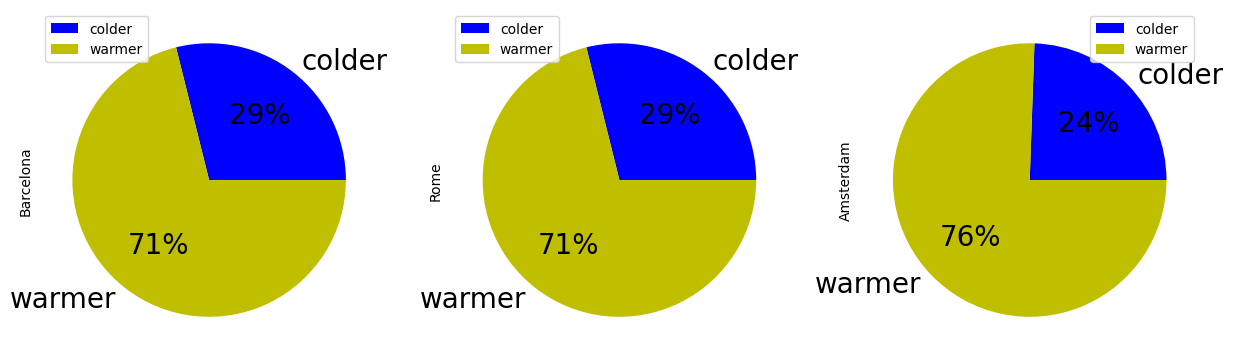

In [29]:
# # Jezeli wartosci sa za male to mozemy zwiekszyc liczby  zeby byly bardziej widoczne ---> fontsize
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['b','y'],labels=['colder','warmer'],autopct='%.0f%%',fontsize=20)

array([<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>,
       <Axes: ylabel='Amsterdam'>], dtype=object)

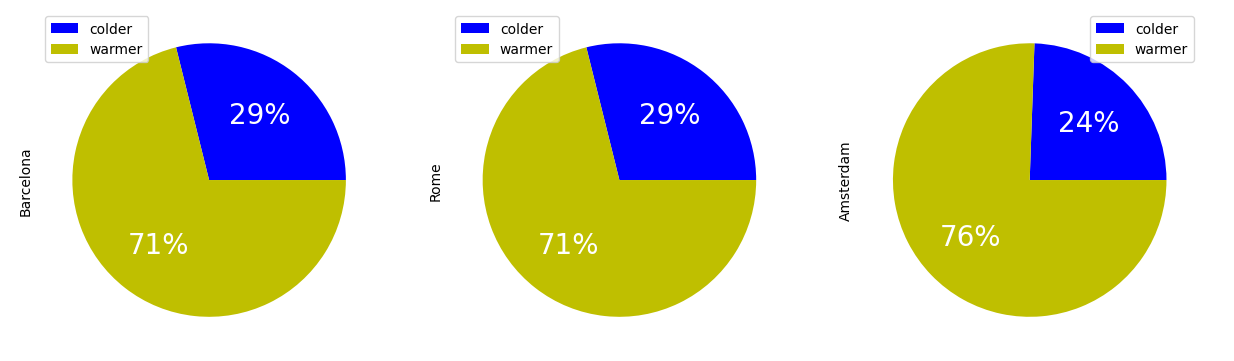

In [30]:
# zmienic kontrast zeby procenty byly w innym kolorze ---> textprops (jest budowany na zasadzie slownika )
# W slowniku kluczem jest kolor a wartoscia jest w czyli white 
cities3.plot(kind='pie',subplots=True,figsize=(15,5),colors=['b','y'],labels=['colder','warmer'],autopct='%.0f%%',fontsize=20,textprops=dict(color='w'))

array([[<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>],
       [<Axes: ylabel='Amsterdam'>, <Axes: >]], dtype=object)

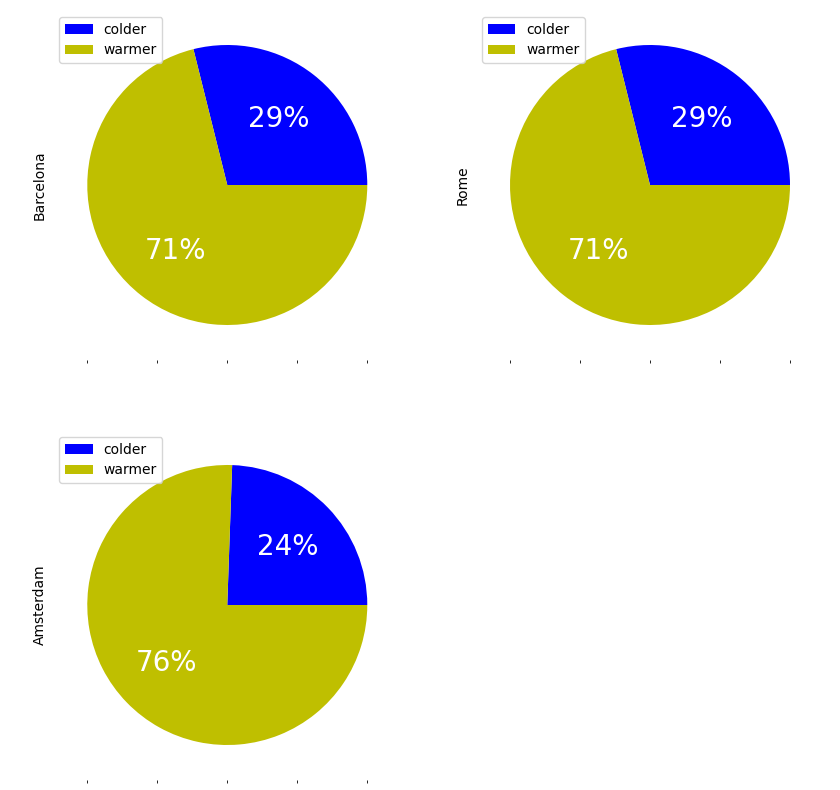

In [32]:
# Mozna ustalic ile wykresow ma byc pionowo a ile wykresow ma byc poziomo 
# dwa wykresy obok siebie i dwa wykresy pod soba jedno pole bedzie puste 
# zeby jednak to byly kola to zmienic trzeba rowniez figsize (10,10)
cities3.plot(kind='pie',subplots=True,figsize=(10,10),colors=['b','y'],labels=['colder','warmer'],autopct='%.0f%%',fontsize=20,textprops=dict(color='w'),layout=(2,2))

array([[<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>],
       [<Axes: ylabel='Amsterdam'>, <Axes: >]], dtype=object)

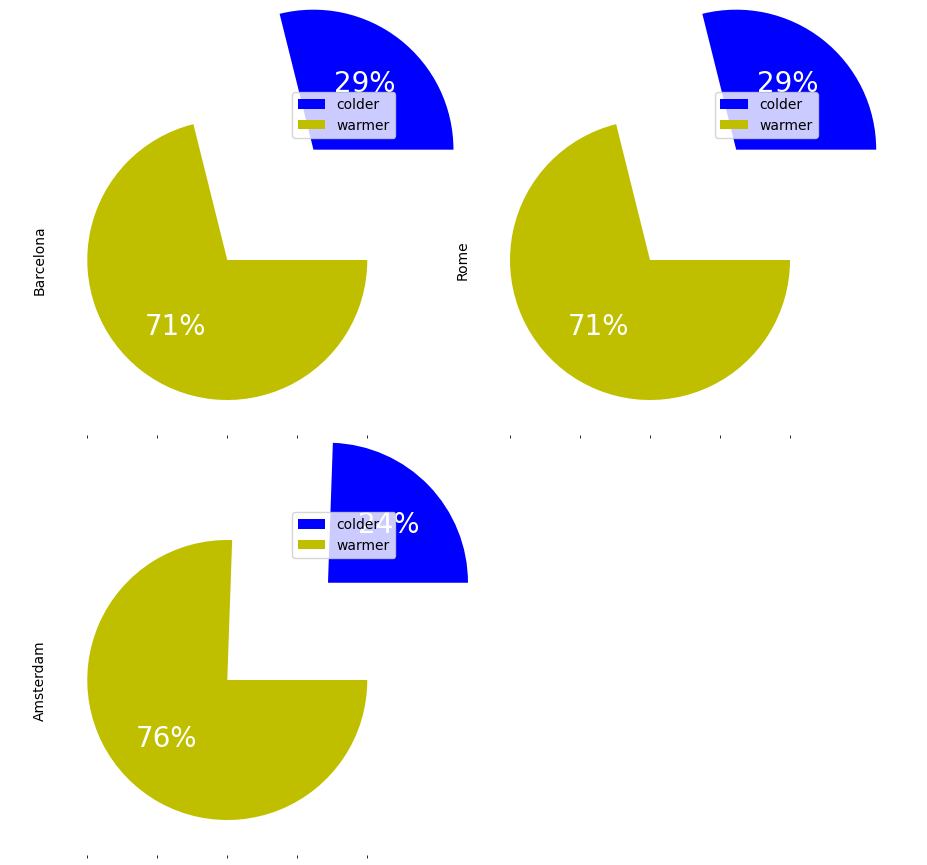

In [33]:
# zdarza sie ze na wykresie kolowym jeden z wycinkow jest wysuniety mamy mozliwosc i w module pandas 
# explode to samo co colors w colors okreslalismy pierwsza wartosc niebieska a druga zielona 
# explode jak podamy wartosc 0 to znaczy ze ten wycinek o ktorym idzie mowa ma byc nie wysuniety jezeli podamy wicej od 0 to ocznacza ze wycinek ma byc wysuniety 
# explode chcemy wysunac odcinki odpowidajace za chlodniejsze dni dla tego wpisujemy ---> explode=(1,0)
# wysuniecie odbywa sie na jeden cal 
cities3.plot(kind='pie',subplots=True,figsize=(10,10),colors=['b','y'],labels=['colder','warmer'],autopct='%.0f%%',fontsize=20,textprops=dict(color='w'),layout=(2,2),explode=(1,0))

array([[<Axes: ylabel='Barcelona'>, <Axes: ylabel='Rome'>],
       [<Axes: ylabel='Amsterdam'>, <Axes: >]], dtype=object)

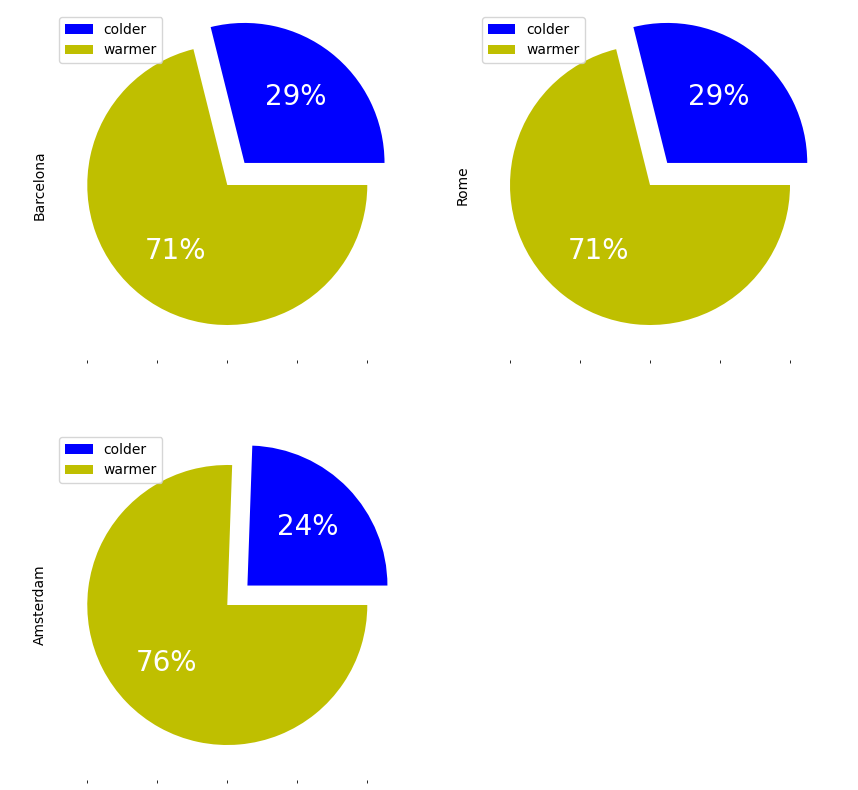

In [34]:
# mniejsze wysuniecie 
cities3.plot(kind='pie',subplots=True,figsize=(10,10),colors=['b','y'],labels=['colder','warmer'],autopct='%.0f%%',fontsize=20,textprops=dict(color='w'),layout=(2,2),explode=(0.2,0))